In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#create dataframe by reading the CSV file
df = pd.read_csv('DATASETF.csv')

In [3]:
#just viewing dataframe
df.head()

,Districts,Year,Season,Crops,Yield,Soil_Mois,Soil_Temp
0,Ariyalur,2018,Rabi,Groundnut,4550,19.92,26.27
1,Ariyalur,2018,Kharif,Groundnut,3190,24.00,30.18
2,Ariyalur,2018,Rabi,Maize,7000,19.92,26.27
3,Ariyalur,2018,Kharif,Maize,5100,24.00,30.18
4,Ariyalur,2018,Rabi,Onion,5560,19.92,26.27


In [4]:
#dimension of dataframe
df.shape

(10430, 7)

In [5]:
#list of items and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Districts  10430 non-null  object 
 1   Year       10430 non-null  int64  
 2   Season     10430 non-null  object 
 3   Crops      10430 non-null  object 
 4   Yield      10430 non-null  int64  
 5   Soil_Mois  10430 non-null  float64
 6   Soil_Temp  10430 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 570.5+ KB


In [6]:
#to check for null values
df.isnull().sum()

Districts    0
Year         0
Season       0
Crops        0
Yield        0
Soil_Mois    0
Soil_Temp    0
dtype: int64

In [7]:
#to check for duplicated values
df.duplicated().sum()

0

In [8]:
#remove duplicated values
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

# Transforming SOIL_MOIS and SOIL_TEMP
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [10]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['Soil_Mois'].apply(isStr)].index
to_drop1 = df[df['Soil_Temp'].apply(isStr)].index

In [11]:
#remove string values and keep only float values
df = df.drop(to_drop)
df = df.drop(to_drop1)

In [12]:
df

,Districts,Year,Season,Crops,Yield,Soil_Mois,Soil_Temp
0,Ariyalur,2018,Rabi,Groundnut,4550,19.92,26.27
1,Ariyalur,2018,Kharif,Groundnut,3190,24.00,30.18
2,Ariyalur,2018,Rabi,Maize,7000,19.92,26.27
3,Ariyalur,2018,Kharif,Maize,5100,24.00,30.18
4,Ariyalur,2018,Rabi,Onion,5560,19.92,26.27
...,...,...,...,...,...,...,...
10425,Yanam,2022,Kharif,Onion,500,26.40,25.16
10426,Yanam,2022,Rabi,Urad,13260,19.60,27.19
10427,Yanam,2022,Kharif,Urad,5654,24.40,25.16
10428,Yanam,2022,Rabi,Cotton,1000,14.80,28.34


In [13]:
#These lines attempt to convert all the values in the Soil_Mois and Soil_Temp columns to numeric types
df['Soil_Mois'] = pd.to_numeric(df['Soil_Mois'], errors='coerce')
df['Soil_Temp'] = pd.to_numeric(df['Soil_Temp'], errors='coerce')

# Graph Frequency vs Area

In [14]:
#number of states used
'''len(df['States'].unique())'''

"len(df['States'].unique())"

In [15]:
#graph of how much times each state used in dataset
'''plt.figure(figsize=(10,5))
sns.countplot(y=df['States'])
plt.show()'''

"plt.figure(figsize=(10,5))\nsns.countplot(y=df['States'])\nplt.show()"

In [16]:
#to find yield of crops per state
'''country = df['States'].unique()
yield_per_state = []
for state in country:
    yield_per_state.append(df[df['States']==state]['Yield'].sum())'''

"country = df['States'].unique()\nyield_per_state = []\nfor state in country:\n    yield_per_state.append(df[df['States']==state]['Yield'].sum())"

In [17]:
#total yield in all states
df['Yield'].sum()

47596023

In [18]:
#yield_per_state

# Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Crops'>

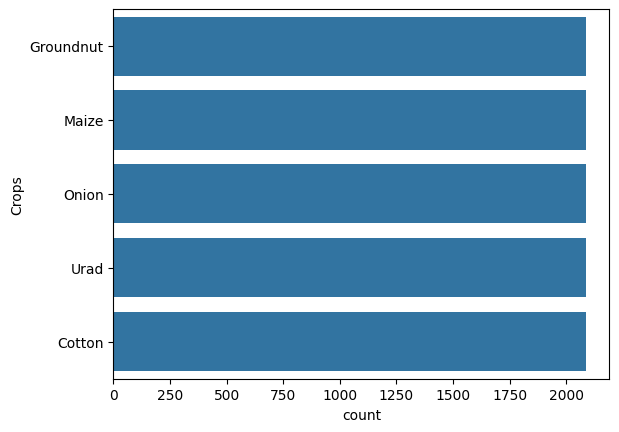

In [19]:
sns.countplot(y=df['Crops'])

# Yield Vs Item

In [20]:
#visualising yield of each crop
crops = df['Crops'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Crops']==crop]['Yield'].sum())

<Axes: >

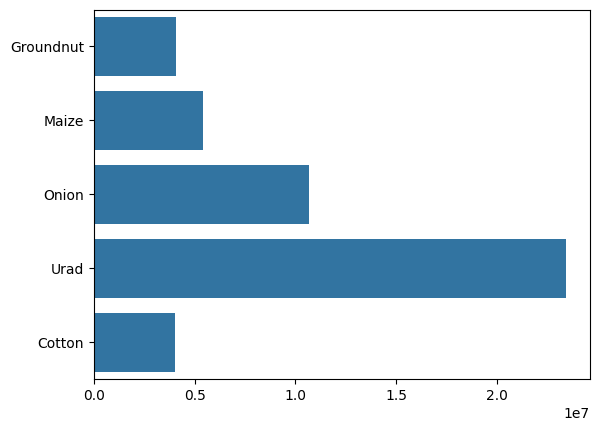

In [21]:
sns.barplot(y=crops,x=yield_per_crop)

In [22]:
import plotly.express as px

fig = px.box(df, y='Yield', points='all')
fig.show()

In [23]:
import plotly.express as px

fig = px.box(df, y='Soil_Temp', points='all')
fig.show()

In [24]:
import plotly.express as px

fig = px.box(df, y='Soil_Mois', points='all')
fig.show()

In [25]:
'''df_boston = df
df_boston.columns = df_boston.columns
df_boston.head()

print("old shape", df_boston.shape)

import numpy as np
import pandas as pd

file_path = 'DATASETF.csv'
data = pd.read_csv(file_path)

columns = ['Yield', 'Soil_Mois', 'Soil_Temp']

outliers_indices = set()

for col in columns:
    Q1 = np.percentile(df_boston[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df_boston[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    upper_outliers = np.where(df_boston[col] >= upper_bound)[0]
    lower_outliers = np.where(df_boston[col] <= lower_bound)[0]

    outliers_indices.update(upper_outliers)
    outliers_indices.update(lower_outliers)

df_boston.drop(list(outliers_indices), inplace=True)

print("New shape:", df.shape)'''

'df_boston = df\ndf_boston.columns = df_boston.columns\ndf_boston.head()\n\nprint("old shape", df_boston.shape)\n\nimport numpy as np\nimport pandas as pd\n\nfile_path = \'DATASETF.csv\'\ndata = pd.read_csv(file_path)\n\ncolumns = [\'Yield\', \'Soil_Mois\', \'Soil_Temp\']\n\noutliers_indices = set()\n\nfor col in columns:\n    Q1 = np.percentile(df_boston[col], 25, interpolation=\'midpoint\')\n    Q3 = np.percentile(df_boston[col], 75, interpolation=\'midpoint\')\n    IQR = Q3 - Q1\n\n    upper_bound = Q3 + 1.5 * IQR\n    lower_bound = Q1 - 1.5 * IQR\n\n    upper_outliers = np.where(df_boston[col] >= upper_bound)[0]\n    lower_outliers = np.where(df_boston[col] <= lower_bound)[0]\n\n    outliers_indices.update(upper_outliers)\n    outliers_indices.update(lower_outliers)\n\ndf_boston.drop(list(outliers_indices), inplace=True)\n\nprint("New shape:", df.shape)'

In [26]:
#df = df_boston

# Train Test split Rearranging Columns

In [27]:
#splitting data into inputs and output coloumn. Yield is output rest are input
col = ['Year', 'Soil_Mois','Soil_Temp','Districts', 'Crops', 'Season', 'Yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
X.head()

,Year,Soil_Mois,Soil_Temp,Districts,Crops,Season
0,2018,19.92,26.27,Ariyalur,Groundnut,Rabi
1,2018,24.00,30.18,Ariyalur,Groundnut,Kharif
2,2018,19.92,26.27,Ariyalur,Maize,Rabi
3,2018,24.00,30.18,Ariyalur,Maize,Kharif
4,2018,19.92,26.27,Ariyalur,Onion,Rabi


In [29]:
y.head()

0    4550
1    3190
2    7000
3    5100
4    5560
Name: Yield, dtype: int64

In [30]:
#SPLIT DATASET INTO TRAIN AND TEST DATA. 80% FOR TRAINING AND 20 FOR TESTING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [31]:
X_train.head()

,Year,Soil_Mois,Soil_Temp,Districts,Crops,Season
6759,2015,24.80,25.58,Gulbarga,Cotton,Kharif
3894,2019,14.40,28.40,Peddapalli,Onion,Rabi
3147,2016,26.40,26.35,Komaram bheem asifabad,Urad,Kharif
2606,2017,14.40,27.61,Jagitial,Urad,Rabi
627,2020,32.48,26.35,Kanchipuram,Urad,Kharif


# Converting Categorical to Numerical and Scaling the values

In [32]:
#STANDARDSCALING AND ONEHOTECODING THE DATA SET
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder()
scale = StandardScaler()

numeric_features = [0, 1, 2]  # Indices of numeric columns
categorical_features = [3, 4, 5]  # Indices of categorical columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
'''preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [1, 2]),
            ('OHE', ohe, [3, 4, 5]),
        ],
)'''

"preprocesser = ColumnTransformer(\n        transformers = [\n            ('StandardScale', scale, [1, 2]),\n            ('OHE', ohe, [3, 4, 5]),\n        ],\n)"

In [33]:
#saving transformed data in new variables
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [34]:
preprocessor.get_feature_names_out(col[:-1])

array(['num__Year', 'num__Soil_Mois', 'num__Soil_Temp',
       'cat__Districts_ Adilabad', 'cat__Districts_Ahmednagar',
       'cat__Districts_Akola', 'cat__Districts_Amravati',
       'cat__Districts_Anantapur', 'cat__Districts_Ariyalur',
       'cat__Districts_Aurangabad', 'cat__Districts_Bagalkot',
       'cat__Districts_Bangalore rural', 'cat__Districts_Beed',
       'cat__Districts_Belgaum', 'cat__Districts_Bellary',
       'cat__Districts_BengaluruUrban', 'cat__Districts_Bhadradri',
       'cat__Districts_Bhandara', 'cat__Districts_Bidar',
       'cat__Districts_Bijapur', 'cat__Districts_Buldhana',
       'cat__Districts_Chamarajanagar', 'cat__Districts_Chandrapur',
       'cat__Districts_Chikballapur', 'cat__Districts_Chikmagalur',
       'cat__Districts_Chitradurga', 'cat__Districts_Chittoor',
       'cat__Districts_Coimbatore', 'cat__Districts_Cuddalore',
       'cat__Districts_Davangere', 'cat__Districts_Dharmapuri',
       'cat__Districts_Dharwad', 'cat__Districts_Dhule',
  

# Let's train our model

In [35]:
df.head()

,Year,Soil_Mois,Soil_Temp,Districts,Crops,Season,Yield
0,2018,19.92,26.27,Ariyalur,Groundnut,Rabi,4550
1,2018,24.00,30.18,Ariyalur,Groundnut,Kharif,3190
2,2018,19.92,26.27,Ariyalur,Maize,Rabi,7000
3,2018,24.00,30.18,Ariyalur,Maize,Kharif,5100
4,2018,19.92,26.27,Ariyalur,Onion,Rabi,5560


In [36]:
yield_mean = df['Yield'].mean()
print(f"Mean Yield: {yield_mean}")

Mean Yield: 4563.377085330777


In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor(),
    'knr':KNeighborsRegressor(),
    'rfr':RandomForestRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 2895.463329538819 score : 0.31823390246767325


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1575833447.949829, tolerance: 47987457.19672715



lss : mae : 2858.364325468458 score : 0.3190469687126005
Rid : mae : 2882.8790559640784 score : 0.3191400210569153
Dtr : mae : 1208.2804410354745 score : 0.7660117023935322
knr : mae : 2029.6831255992329 score : 0.6325632834745483
rfr : mae : 1131.6944582933845 score : 0.813016369967375


In [38]:
from sklearn.metrics import r2_score
rfr_model =RandomForestRegressor(random_state=0)
rfr_model.fit(X_train_dummy,y_train)
rfr_model.predict(X_test_dummy)
r2score_rfr = r2_score(y_test,y_pred)
print("r2 score of:", r2score_rfr)

r2 score of: 0.813016369967375


In [39]:
import numpy as np

# Define the recommendation function
def recommendations(Year, Soil_Mois, Soil_Temp, Districts, Crops, Season):
    features = np.array([[Year, Soil_Mois, Soil_Temp, Districts, Crops, Season]])
    transform_features = preprocessor.transform(features)
    prediction = rfr_model.predict(transform_features).reshape(1, -1)
    return prediction[0][0]



In [40]:
Year = 2024
Soil_Mois = 24.54
Soil_Temp = 30.45
Districts = "Ariyalur"
Crops = "Maize"
Season = "Rabi"

predict = recommendations(Year, Soil_Mois, Soil_Temp, Districts, Crops, Season)
print(predict)


5985.9


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



In [41]:
import pickle 
import joblib
joblib.dump(rfr_model, 'model_india_yield.pkl')
joblib.dump(preprocessor, open('preprocessor_india_yield.pkl','wb'))
